In [1]:
#import the necessary package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


#Our Feature Engineering Steps
#1: use.drop to drop the ID
#2: use scatterplot to find and remove outliers
#3: Plot Q-Q(quantile-quantile) plot to check the y(sale price) normality, and use log(Sale price) to replace the original saleprice.
#4: combine train data and test data and get a new data set called all_data
#5: check the NA values proportion in train data and all_data.
#6: check the NA values meaning in txt file, and fill the NA value that has meaning (such as None)
#7: For the rest columns that have NA values,if the number of NA value is very small (like one or two), then just filled it with the mean value(for numeric) or with the mode(for category) 
#8: If there has some variables have a large proportion of NA values, then check whether the NA values are random missing (method: add new variables about whether this variable is NA or not, then build regression or classification model about new variable and Sale Price, and see whether the new variable is significant when predicting the Sale price). This step can only be used on the training dataset, since the test data set doesn't have sale price). If these NA values are random missing, then just use the same way as before(relace NA with mean or mode)
#9: Label Encoding some categorical variables that may contain information in their ordering set.
#10: One-hot Encoding other categorical variables that don't contain information in their ordering set.
#11: For those variables that contain NA values that are not random missing and the proportion of NA values are not small, build regression model(for continuous variable) or classification model (for category variable) to fit that variable. (Set that variable as the dependent variable and other variables as independent variables), and use the model to predict and fill those NA values.


In [2]:
import statsmodels.api as sm 
import pylab as py 
import math

# Feature Engineering

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(1460, 81)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.shape

(1459, 80)

In [7]:
type(train)

pandas.core.frame.DataFrame

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
print("The train data column number before dropping Id feature is : {} ".format(len(train.columns)))
# .format is the method of the string, which can link the output of the function to the string
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data column number before dropping Id feature is : 81 
The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


In [10]:
train_ID = train['Id']
test_ID = test['Id']

In [11]:
# Drop Id column
train.drop('Id', axis=1, inplace = True)
#Use axis=1 to apply a method across each row, or to the column labels.
#inplace argument to update the memory
test.drop('Id', axis=1, inplace = True)

In [12]:
test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


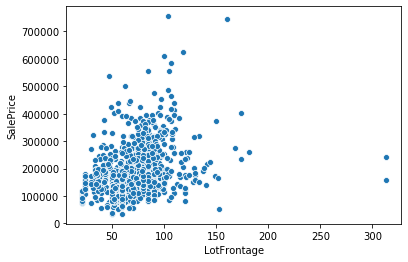

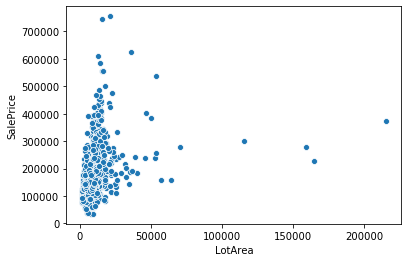

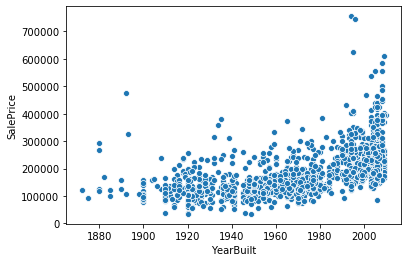

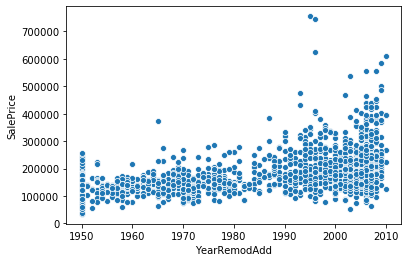

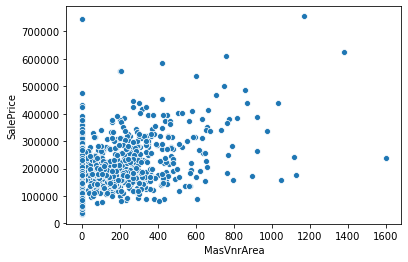

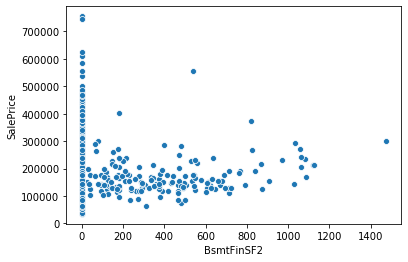

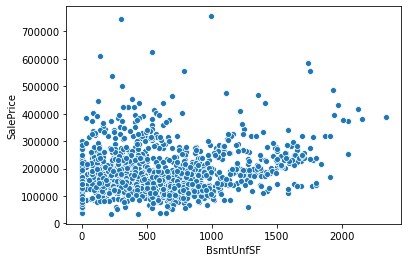

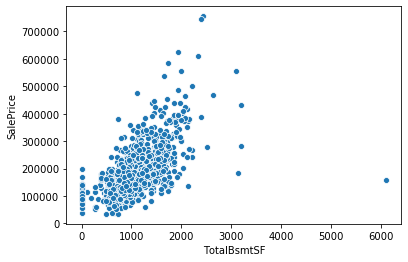

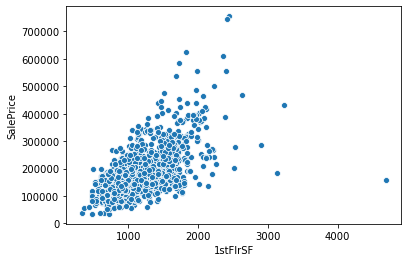

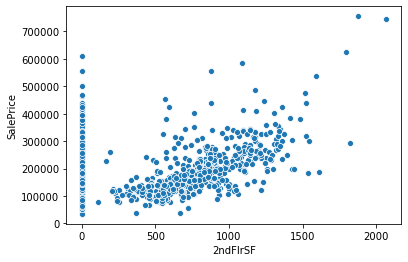

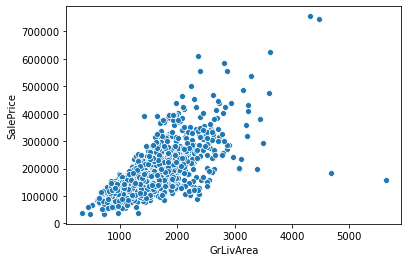

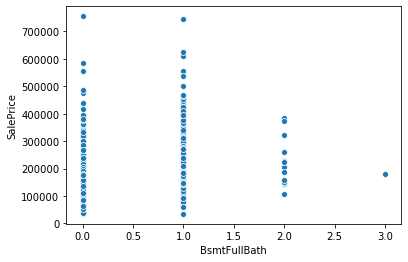

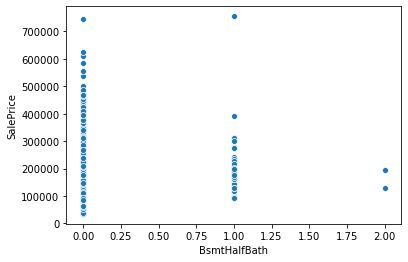

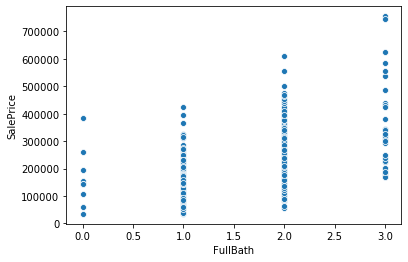

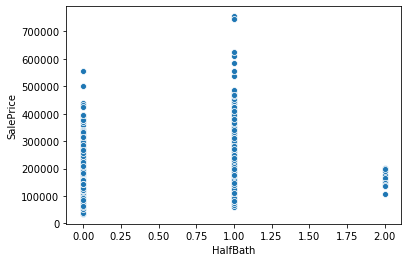

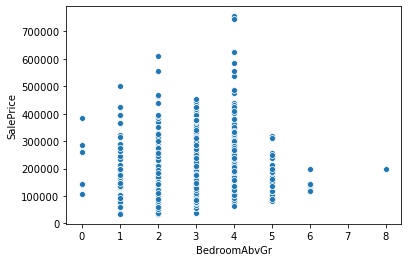

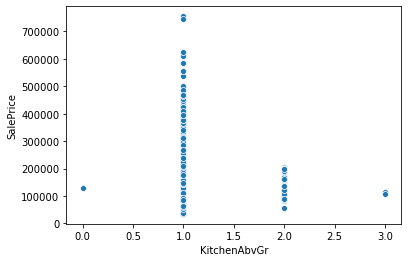

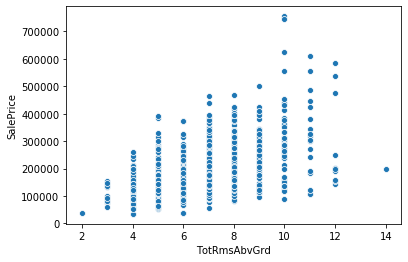

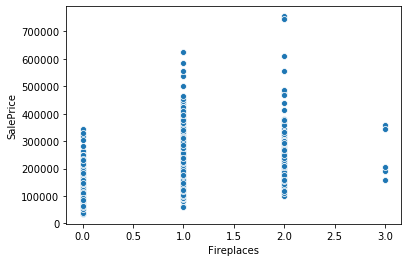

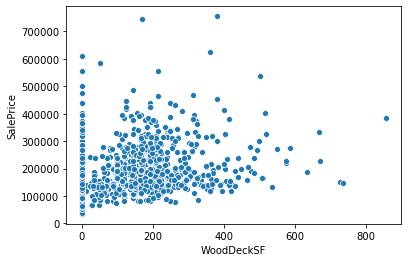

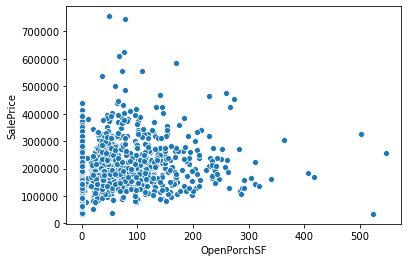

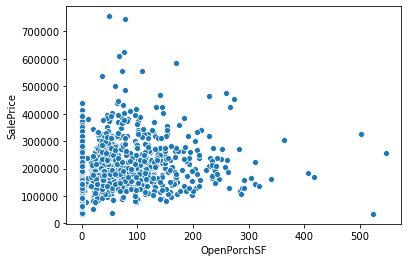

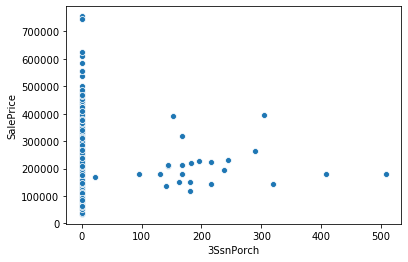

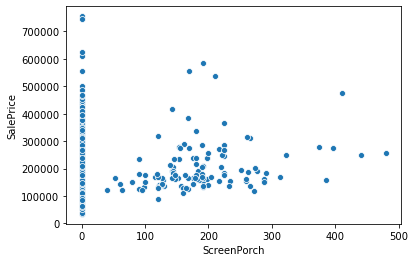

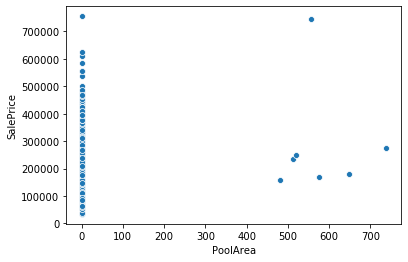

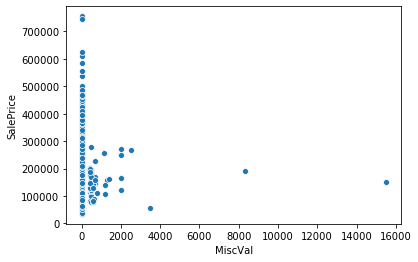

In [13]:
for col in ('LotFrontage','LotArea','YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','OpenPorchSF','3SsnPorch','ScreenPorch','PoolArea','MiscVal'):
    sns.scatterplot(x=train[col], y = train['SalePrice'],legend='brief')
    plt.show()
#Plot SalePrice vs all numeric variables to check outliers

In [14]:
train = train.drop(train[(train['LotFrontage']>250)].index, axis=0)
train = train.drop(train[(train['LotArea']>150000)].index, axis=0)
train = train.drop(train[(train['MasVnrArea']>1500) ].index, axis=0)
train = train.drop(train[(train['TotalBsmtSF']>5000)].index, axis=0)
train = train.drop(train[(train['1stFlrSF']>4000) ].index, axis=0)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index, axis=0)
train = train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index, axis=0)
train = train.drop(train[(train['MiscVal']>16000)].index, axis=0)
#Remove outliers based on the plots

In [15]:
train.shape

(1452, 80)

180718.55785123966 79295.1425855148


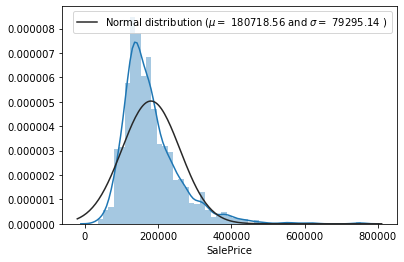

In [16]:
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(train['SalePrice'])
print(mu,sigma)

plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
#using $ $ to convert alphabet to roman character 

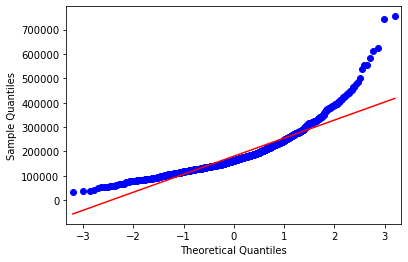

In [17]:
import scipy.stats as stats
probplot = sm.ProbPlot(train['SalePrice'])
fig = probplot.qqplot(line='r')
plt.show()
##

In [18]:
train['SalePrice'] = np.log1p(train['SalePrice'])
#sns.distplot(train['SalePrice'],fit =norm)

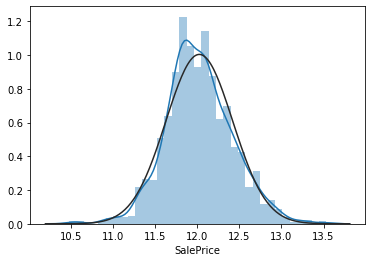

In [19]:
sns.distplot(train['SalePrice'],fit =norm)

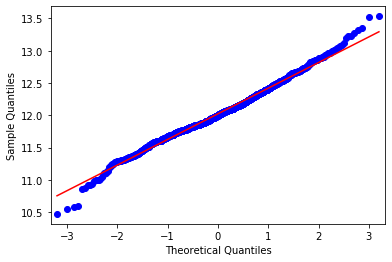

In [20]:
probplot = sm.ProbPlot(train['SalePrice'])
fig = probplot.qqplot(line='r')
plt.show()

In [21]:
#Put train dataset and testdataset into one dataset called all_data
all_data = pd.concat((train, test)).reset_index(drop=False)

In [22]:
all_data.head(3)

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171


In [23]:
all_data.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
2906          NaN
2907          NaN
2908          NaN
2909          NaN
2910          NaN
Name: SalePrice, Length: 2911, dtype: float64

In [24]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [25]:
all_data.head(3)

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [26]:
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2911, 79)


In [27]:
#find out the prob of missing data
# missing data
train_na = (train.isnull().sum() / len(train)) * 100

In [28]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

In [29]:
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:70]
train_na

PoolQC          99.586777
MiscFeature     96.418733
Alley           93.801653
Fence           80.716253
FireplaceQu     47.451791
LotFrontage     17.699725
GarageYrBlt      5.509642
GarageType       5.509642
GarageFinish     5.509642
GarageQual       5.509642
GarageCond       5.509642
BsmtFinType2     2.617080
BsmtExposure     2.617080
BsmtFinType1     2.548209
BsmtCond         2.548209
BsmtQual         2.548209
MasVnrArea       0.550964
MasVnrType       0.550964
Electrical       0.068871
dtype: float64

In [30]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:70]
all_data_na

PoolQC          99.690828
MiscFeature     96.461697
Alley           93.232566
Fence           80.419100
FireplaceQu     48.746135
LotFrontage     16.626589
GarageFinish     5.427688
GarageYrBlt      5.427688
GarageQual       5.427688
GarageCond       5.427688
GarageType       5.358983
BsmtExposure     2.816901
BsmtCond         2.816901
BsmtQual         2.782549
BsmtFinType2     2.748196
BsmtFinType1     2.713844
MasVnrType       0.824459
MasVnrArea       0.790106
MSZoning         0.137410
BsmtFullBath     0.068705
BsmtHalfBath     0.068705
Utilities        0.068705
Functional       0.068705
Exterior2nd      0.034352
Exterior1st      0.034352
SaleType         0.034352
BsmtFinSF1       0.034352
BsmtFinSF2       0.034352
BsmtUnfSF        0.034352
Electrical       0.034352
KitchenQual      0.034352
GarageCars       0.034352
GarageArea       0.034352
TotalBsmtSF      0.034352
dtype: float64

In [31]:
len(train_na)

19

In [32]:
len(all_data_na)
#After we check out the missing columns of train and all data, we find that the there are a big diference bertween these two dataset.

34

In [33]:
all_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [34]:
# LotFrontage: Linear feet of street connected to property. originally filled by medians
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [35]:
train.groupby("Neighborhood")["LotFrontage",'Neighborhood'].head(5)  # after filling with median

,LotFrontage,Neighborhood
0,65.0,CollgCr
1,80.0,Veenker
2,68.0,CollgCr
3,60.0,Crawfor
4,84.0,NoRidge
...,...,...
504,24.0,NPkVill
550,53.0,NPkVill
599,24.0,Blueste
675,24.0,NPkVill


In [36]:
train = train.drop(['Utilities'], axis=1)
# : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
# this feature won't help in predictive modelling. We can then safely remove it.

In [37]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
# # NA just means None for these variables based on the data description

In [38]:
for col2 in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    train[col2] = train[col2].fillna(train[col2].mode()[0])


In [39]:
#Check remaining missing values if any 
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head()

,Missing Ratio
GarageYrBlt,5.509642
MasVnrArea,0.550964
MasVnrType,0.550964


#Create a higher dimension for the GarageYrBlt MasVnrType MasVnrArea column


In [40]:
def setGarageYrBlt(df):
    df.loc[(df.GarageYrBlt.notnull()), 'GarageYrBlt_known']=1
    df.loc[(df.GarageYrBlt.isnull()), 'GarageYrBlt_known']=0
    return df

def setMasVnrType(df):
    df.loc[(df.MasVnrType.notnull()), 'MasVnrType_known']=1
    df.loc[(df.MasVnrType.isnull()), 'MasVnrType_known']=0
    return df

def setMasVnrArea(df):
    df.loc[(df.MasVnrArea.notnull()), 'MasVnrArea_known']=1
    df.loc[(df.MasVnrArea.isnull()), 'MasVnrArea_known']=0
    return df


In [41]:
#create the higher dimension to check out the influence of the missing value
setGarageYrBlt(train)
setMasVnrType(train)
setMasVnrArea(train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_known,MasVnrType_known,MasVnrArea_known
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,2,2008,WD,Normal,12.247699,1.0,1.0,1.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,None,0,5,2007,WD,Normal,12.109016,1.0,1.0,1.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,9,2008,WD,Normal,12.317171,1.0,1.0,1.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,None,0,2,2006,WD,Abnorml,11.849405,1.0,1.0,1.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,None,0,12,2008,WD,Normal,12.429220,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,8,2007,WD,Normal,12.072547,1.0,1.0,1.0
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,2,2010,WD,Normal,12.254868,1.0,1.0,1.0
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,Shed,2500,5,2010,WD,Normal,12.493133,1.0,1.0,1.0
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,4,2010,WD,Normal,11.864469,1.0,1.0,1.0


# Check out if the value missing or not in GarageYrBlt MasVnrType MasVnrArea can significant influence the final SalesPric

In [42]:
#import linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [43]:
#For GarageYrBlt_known
xGa=train['GarageYrBlt_known'].values.reshape(-1,1)   #.value using for convert the value in df into array
yGa=train['SalePrice'].values.reshape(-1,1)  #reshape(-1,1) means convert the data shape tp 1 column and automatically assign the number of the row

In [44]:
reg.fit(xGa,yGa)

LinearRegression()

In [45]:
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print(reg.coef_)

The linear model is: Y = 11.505 + 0.54892X
[[0.54892435]]


In [46]:
xGa2 = sm.add_constant(xGa)     # add a column of ones into array to represent the intercept in the summary
est = sm.OLS(yGa, xGa2)
est2 = est.fit()
print(est2.summary())
# We can see the p valuefor GarageYrBlt_known is very small, which means it is significant. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     160.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           6.94e-35
Time:                        00:50:49   Log-Likelihood:                -643.53
No. Observations:                1452   AIC:                             1291.
Df Residuals:                    1450   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5048      0.042    272.823      0.0

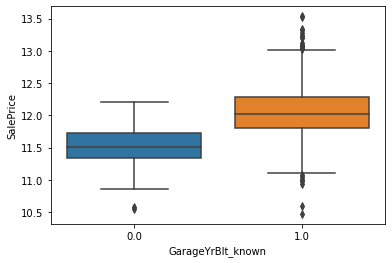

In [47]:
sns.boxplot(train['GarageYrBlt_known'], train['SalePrice'])
#The box plot also shows the obvious Saleprice difference between two conditions (GarageYrBlt known and GarageYrBlt unknown)

In [48]:
#For MasVnrType_known
xMT=train['MasVnrType_known'].values.reshape(-1,1)
yMT=train['SalePrice'].values.reshape(-1,1)

In [49]:
reg.fit(xMT,yMT)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 12.325 + -0.30327X


In [50]:
xMT2 = sm.add_constant(xMT)
est = sm.OLS(yMT, xMT2)
est2 = est.fit()
print(est2.summary())
#The p valeu for MasVnrType_known is also very small, which means MasVnrType_known is also significant. 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.647
Date:                Sun, 26 Jul 2020   Prob (F-statistic):             0.0313
Time:                        00:50:50   Log-Likelihood:                -717.25
No. Observations:                1452   AIC:                             1438.
Df Residuals:                    1450   BIC:                             1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3251      0.140     87.850      0.0

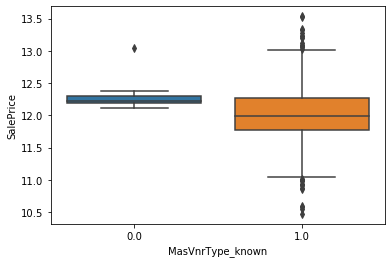

In [51]:
sns.boxplot(train['MasVnrType_known'], train['SalePrice'])
#The box plot also shows the obvious Saleprice difference between two conditions (MasVnrType known and MasVnrType unknown)

We find the value of MasVnrType_known and MasVnrArea_known are the same, so we don't need to test MasVnrArea_known


After we check the relationship between GarageYrBlt MasVnrType MasVnrArea and the Salesprice, we can see that the value missing or not can signigicant influnence the range of the SalesPrice. So we need to use more advanced tools to predict and refill the missing value

# Check out the number of row that "GarageArea" and "GarageCars" with missing value


In [52]:
all_data[(all_data.GarageArea.isnull())][["GarageArea"]]


,GarageArea
2568,NaN


In [53]:
all_data[(all_data.GarageArea.isnull())][["GarageCars"]]
#there are only 1 row with missing data, we can refill it easily without so much concern

,GarageCars
2568,NaN


In [54]:
all_data[(all_data.BsmtFullBath.isnull())]
#there are only 2 rows with missing data, we can refill it easily without so much concerns

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2112,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
2180,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


# Check out the relationship between 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF' after we refill the NA into 0


In [55]:
Bsmt = all_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']]

In [56]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'):
    Bsmt[col] = Bsmt[col].fillna(0)

In [57]:
Bsmt.isnull().sum()

BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
dtype: int64

In [58]:
Bsmt.loc[(Bsmt.BsmtFinSF1+Bsmt.BsmtFinSF2+Bsmt.BsmtUnfSF == Bsmt.TotalBsmtSF), 'Is'] = 1

In [59]:
Bsmt[Bsmt.Is !=1]
#we found that it is make sense that refill the NA into 0 

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Is


# Transforming some numerical variables that are really categorical


In [60]:
#tranform the building_class into categorical using astype function rather than apply because of time consuming.
#tranfer the data type into tring type can automatically seems as transfering it into categorical variables
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [61]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2907,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2908,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2909,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Refill NA values in all_data

In [62]:
#create the higher dimension to check out the influence of the missing value
setGarageYrBlt(all_data)
setMasVnrType(all_data)
setMasVnrArea(all_data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_known,MasVnrType_known,MasVnrArea_known
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,1.0,1.0,1.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,1.0,1.0,1.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,1.0,1.0,1.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,1.0,1.0,1.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,6,2006,WD,Normal,0.0,1.0,1.0
2907,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,4,2006,WD,Abnorml,1.0,1.0,1.0
2908,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2006,WD,Abnorml,1.0,1.0,1.0
2909,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,MnPrv,Shed,700,7,2006,WD,Normal,0.0,1.0,1.0


In [63]:
# fill missing values
 # NA just means None here based on the data description
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [64]:
# LotFrontage: Linear feet of street connected to property. originally filled by medians
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [65]:
for col in ('GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [66]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
#Filled with mode

In [67]:
all_data = all_data.drop(['Utilities'], axis=1)
# : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, 
# this feature won't help in predictive modelling. We can then safely remove it.

In [68]:
all_data["Functional"] = all_data["Functional"].fillna("Typ") # as indicated in the dictionary


In [69]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
GarageYrBlt,5.427688
MasVnrType,0.824459
MasVnrArea,0.790106


# Data preselection: using coefficient of variance to preselect the variable


In [70]:
categorical = []
for col in all_data:
    if col not in ('1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
            'BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea',
            'HalfBath','KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal','MoSold',
             'OpenPorchSF','OverallCond','OverallQual','PoolArea','ScreenPorch','TotRmsAbvGrd','TotRmsAbvGrd',
           'TotalBsmtSF','TotalBsmtSF','WoodDeckSF','YearBuilt','YearRemodAdd','YrSold','Utilities'):
        categorical.append(col)
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'GarageYrBlt_known',
 'MasVnrType_known',
 'MasVnrArea_known']

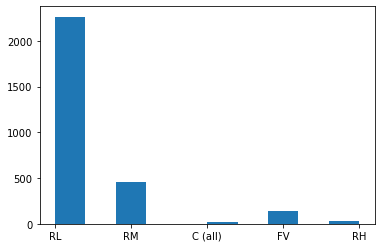

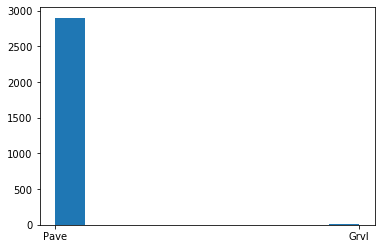

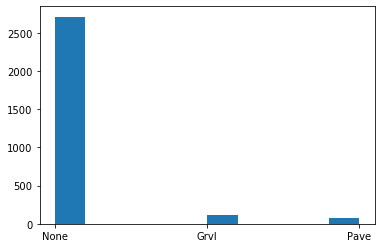

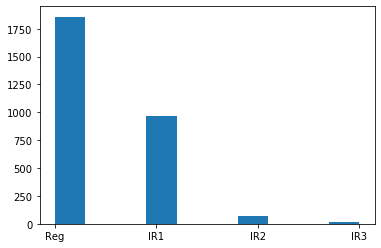

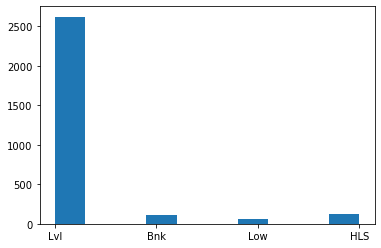

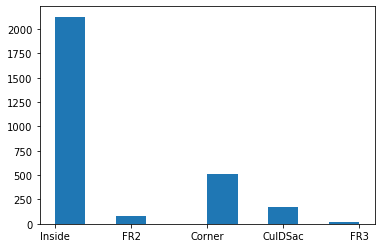

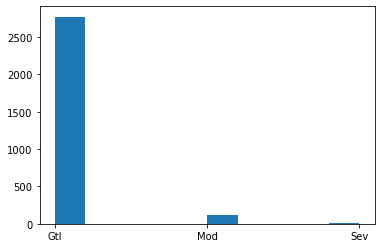

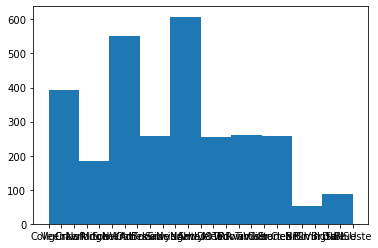

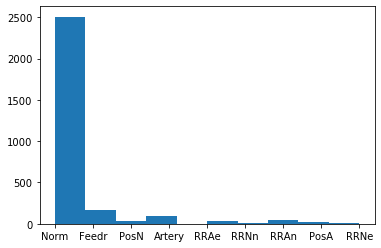

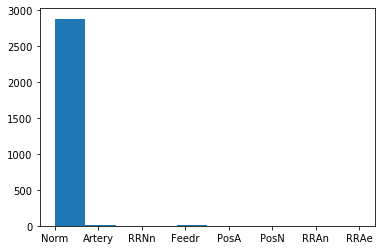

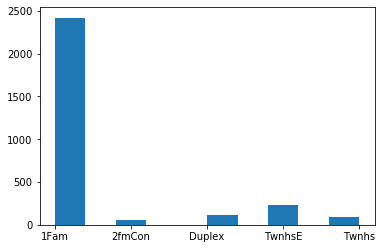

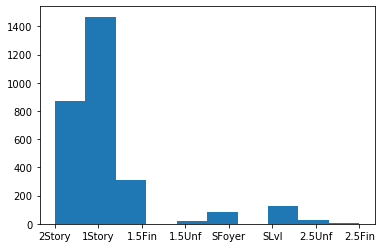

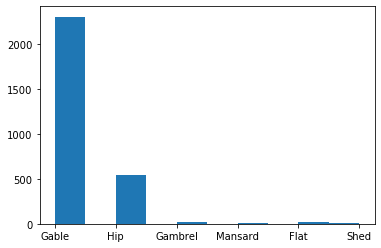

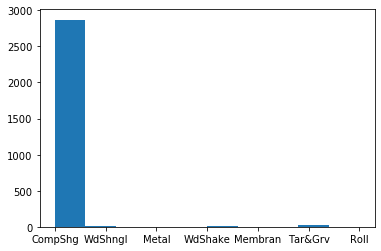

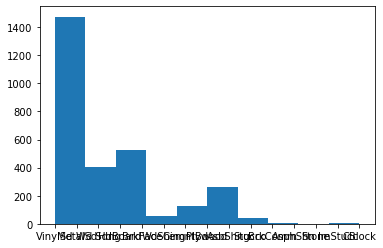

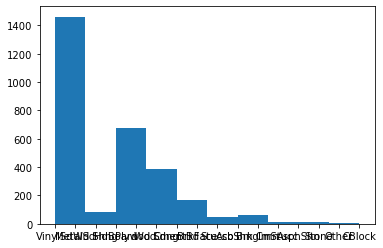

TypeError: nan is not a string

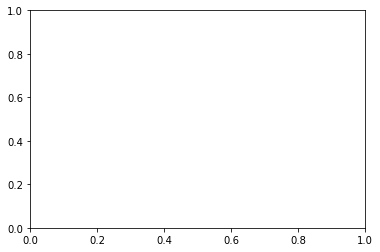

In [71]:
import matplotlib.pyplot as plt
for col in categorical:
    plt.hist(all_data[col])
    plt.show()

In [74]:
all_data = all_data.drop(['Condition2','Heating','PoolQC','RoofMatl','Street'], axis=1)

In [75]:
all_data.shape

(2911, 76)

# Find skew features and Box Cox Transformation of (highly) skewed features

In [76]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt_known',
       'MasVnrType_known', 'MasVnrArea_known'],
      dtype='object')

In [77]:
# Check the skew of all numerical features
from scipy.stats import skew 
skewed_feats = all_data[['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(100)


Skew in numerical features: 



,Skew
MiscVal,21.940235
PoolArea,17.670290
LowQualFinSF,12.071863
3SsnPorch,11.360117
LotArea,5.290576
KitchenAbvGr,4.295433
BsmtFinSF2,4.157618
EnclosedPorch,4.002465
ScreenPorch,3.953436
BsmtHalfBath,3.939684


In [78]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 32 skewed numerical features to Box Cox transform


In [79]:
unmissing_data = all_data.dropna()

In [80]:
unmissing_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_known,MasVnrType_known,MasVnrArea_known
0,60,RL,5.831328,19.212182,None,Reg,Lvl,Inside,Gtl,CollgCr,...,None,None,0.0,2,2008,WD,Normal,1.0,1.0,1.0
1,20,RL,6.221214,19.712205,None,Reg,Lvl,FR2,Gtl,Veenker,...,None,None,0.0,5,2007,WD,Normal,1.0,1.0,1.0
2,60,RL,5.914940,20.347241,None,IR1,Lvl,Inside,Gtl,CollgCr,...,None,None,0.0,9,2008,WD,Normal,1.0,1.0,1.0
3,70,RL,5.684507,19.691553,None,IR1,Lvl,Corner,Gtl,Crawfor,...,None,None,0.0,2,2006,WD,Abnorml,1.0,1.0,1.0
4,60,RL,6.314735,21.325160,None,IR1,Lvl,FR2,Gtl,NoRidge,...,None,None,0.0,12,2008,WD,Normal,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,20,RL,6.221214,21.060245,None,Reg,Lvl,Inside,Mod,Mitchel,...,None,None,0.0,5,2006,WD,Normal,1.0,1.0,1.0
2904,160,RM,3.932510,13.368020,None,Reg,Lvl,Inside,Gtl,MeadowV,...,None,None,0.0,12,2006,WD,Abnorml,1.0,1.0,1.0
2907,160,RM,3.932510,14.013314,None,Reg,Lvl,Inside,Gtl,MeadowV,...,None,None,0.0,4,2006,WD,Abnorml,1.0,1.0,1.0
2908,20,RL,7.620056,22.782058,None,Reg,Lvl,Inside,Gtl,Mitchel,...,None,None,0.0,9,2006,WD,Abnorml,1.0,1.0,1.0


In [81]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2911, 76)


In [82]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_known,MasVnrType_known,MasVnrArea_known
0,10,RL,5.831328,19.212182,1,3,Lvl,Inside,0,CollgCr,...,4,None,0.000000,4,2,WD,Normal,1.0,1.0,1.0
1,5,RL,6.221214,19.712205,1,3,Lvl,FR2,0,Veenker,...,4,None,0.000000,7,1,WD,Normal,1.0,1.0,1.0
2,10,RL,5.914940,20.347241,1,0,Lvl,Inside,0,CollgCr,...,4,None,0.000000,11,2,WD,Normal,1.0,1.0,1.0
3,11,RL,5.684507,19.691553,1,0,Lvl,Corner,0,Crawfor,...,4,None,0.000000,4,0,WD,Abnorml,1.0,1.0,1.0
4,10,RL,6.314735,21.325160,1,0,Lvl,FR2,0,NoRidge,...,4,None,0.000000,3,2,WD,Normal,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,RM,3.932510,14.081426,1,3,Lvl,Inside,0,MeadowV,...,4,None,0.000000,8,0,WD,Normal,0.0,1.0,1.0
2907,2,RM,3.932510,14.013314,1,3,Lvl,Inside,0,MeadowV,...,4,None,0.000000,6,0,WD,Abnorml,1.0,1.0,1.0
2908,5,RL,7.620056,22.782058,1,3,Lvl,Inside,0,Mitchel,...,4,None,0.000000,11,0,WD,Abnorml,1.0,1.0,1.0
2909,14,RL,5.744420,20.046557,1,3,Lvl,Inside,0,Mitchel,...,2,Shed,11.147538,9,0,WD,Normal,0.0,1.0,1.0


In [83]:
##One hot Encoding other categorical variables that don't contain information in their ordering set

In [84]:
categorical_noorder = []
for col in all_data:
    if col not in ('1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath',
            'BsmtUnfSF','EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea',
            'HalfBath','KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MSSubClass','MasVnrArea','MiscVal','MoSold',
             'OpenPorchSF','OverallCond','OverallQual','PoolArea','ScreenPorch','TotRmsAbvGrd','TotRmsAbvGrd',
           'TotalBsmtSF','TotalBsmtSF','WoodDeckSF','YearBuilt','YearRemodAdd','YrSold','FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','MasVnrType'):
        categorical_noorder.append(col)
categorical_noorder

['MSZoning',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Electrical',
 'GarageType',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'GarageYrBlt_known',
 'MasVnrType_known',
 'MasVnrArea_known']

In [85]:
all_data_one=all_data
#copy all_data


In [86]:

# process columns, apply LabelEncoder to categorical feaall_data_one['c']=pd.get_dummies(all_data_one.c)
all_data_one=pd.get_dummies(all_data_one,columns=['BldgType',
 'Condition1',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'MSZoning',
 'MiscFeature',
 'Neighborhood',
 'RoofStyle',
 'SaleCondition',
 'SaleType'])

In [87]:
all_data_one

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,0,0,0,0,1
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,0,0,0,0,1
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,0,0,0,0,1
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,0,0,0,0,1
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,3.932510,14.081426,1,3,0,1.820334,6,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,0,0,0,0,1
2909,14,5.744420,20.046557,1,3,0,2.055642,4,14.170316,14.170316,...,0,0,0,0,0,0,0,0,0,1


In [88]:
unmissing_data_one=all_data_one.dropna()

In [89]:
unmissing_data_one

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,0,0,0,0,1
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,0,0,0,0,1
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,0,0,0,0,1
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,0,0,0,0,1
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,5,6.221214,21.060245,1,3,1,2.055642,4,14.134068,14.149872,...,0,0,0,0,0,0,0,0,0,1
2904,2,3.932510,13.368020,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,0,0,0,0,1


# Create Regression Models to predict the missing value of GarageYrBlt and MasVnrArea


In [90]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [91]:
model1 = LinearRegression()
model2 = LinearRegression()#identify a linear model
# identify the x and y in the linear regression model
y1= unmissing_data_one[['GarageYrBlt']]
y2= unmissing_data_one[['MasVnrArea']]
X = unmissing_data_one.drop(['GarageYrBlt','MasVnrArea','MasVnrType'], axis=1, inplace = False)

In [92]:
model1.fit(X, y1)
model2.fit(X, y2)

LinearRegression()

In [93]:
Xtry = all_data_one.drop(['GarageYrBlt','MasVnrArea','MasVnrType'], axis=1, inplace = False)
Xtry

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,0,0,0,0,1
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,0,0,0,0,1
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,0,0,0,0,1
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,0,0,0,0,1
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,3.932510,14.081426,1,3,0,1.820334,6,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,0,0,0,0,1
2909,14,5.744420,20.046557,1,3,0,2.055642,4,14.170316,14.170316,...,0,0,0,0,0,0,0,0,0,1


In [94]:
loc = []
for i in range(0,len(all_data_one)):   #detail important!!!!
        if all_data_one['GarageYrBlt_known'][i] == 0:
            loc.append(i)
            
print(loc)

[39, 48, 78, 88, 89, 99, 108, 125, 127, 140, 148, 155, 163, 165, 198, 210, 241, 249, 286, 290, 305, 371, 382, 389, 427, 430, 437, 460, 515, 522, 527, 529, 556, 576, 607, 608, 614, 629, 630, 632, 643, 699, 704, 732, 744, 778, 820, 837, 915, 935, 947, 953, 961, 963, 969, 1002, 1004, 1023, 1031, 1089, 1116, 1124, 1130, 1136, 1166, 1172, 1211, 1212, 1227, 1250, 1276, 1315, 1317, 1318, 1329, 1341, 1399, 1441, 1442, 1445, 1505, 1523, 1531, 1544, 1548, 1550, 1552, 1582, 1585, 1586, 1606, 1607, 1709, 1713, 1779, 1800, 1802, 1803, 1811, 1814, 1823, 1826, 1828, 1831, 1839, 1885, 2002, 2073, 2082, 2085, 2088, 2091, 2096, 2118, 2127, 2143, 2145, 2181, 2182, 2183, 2184, 2185, 2204, 2230, 2238, 2345, 2346, 2390, 2391, 2414, 2418, 2544, 2545, 2549, 2567, 2568, 2571, 2595, 2601, 2683, 2685, 2700, 2759, 2763, 2781, 2783, 2791, 2851, 2854, 2862, 2880, 2883, 2884, 2885, 2901, 2905, 2906, 2909]


In [95]:
all_data_one['GarageYrBlt'][39]

nan

In [96]:
Xtry.iloc[39].values.reshape(-1,1)  #the result of iloc is a series not a array, so let's convert it into arrary and reshape it into 1 rows

array([[15.        ],
       [ 5.83132789],
       [17.9412624 ],
       [ 1.        ],
       [ 3.        ],
       [ 0.        ],
       [ 1.8203341 ],
       [ 4.        ],
       [14.11182739],
       [14.11182739],
       [ 3.        ],
       [ 4.        ],
       [ 3.        ],
       [ 2.        ],
       [ 4.        ],
       [ 4.        ],
       [ 0.        ],
       [ 4.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 4.        ],
       [ 0.        ],
       [12.52811325],
       [ 0.        ],
       [ 0.        ],
       [12.52811325],
       [ 0.        ],
       [ 0.        ],
       [ 1.19431764],
       [ 0.        ],
       [ 1.19431764],
       [ 1.19431764],
       [ 1.        ],
       [ 2.25967379],
       [ 6.        ],
       [ 0.        ],
       [ 3.        ],
       [ 1.        ],
       [ 0.        ],
       [ 0.        ],
       [ 3.        ],
       [ 3.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0

In [97]:
#refill the missing value of the GarageYrBlt
for i in range(0,len(all_data_one)):   #detail important!!!!
        if all_data_one['GarageYrBlt_known'][i] == 0:
            all_data_one['GarageYrBlt'][i] = model1.predict(Xtry.iloc[i].values.reshape(1,-1) )
                                                        
# define one new data instance
# make a prediction
#ynew = model.predict(Xnew)
# show the inputs and predicted outputs
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [98]:
print(all_data_one['GarageYrBlt'].isnull().sum())

0


In [99]:
#refill the missing value of the MasVnrArea

for i in range(1,len(all_data)):
        if all_data_one['MasVnrArea_known'][i] == 0:
            all_data_one['MasVnrArea'][i] = model2.predict(Xtry.iloc[i].values.reshape(1,-1))
        
    
# predict the missing value in the MasVnrArea column.  

In [100]:
print(all_data_one['MasVnrArea'].isnull().sum())

0


# Create Classification Model to predict the missing value of MasVnrType.


In [101]:
y3= unmissing_data_one[['MasVnrType']]

In [102]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X, y3)

KNeighborsClassifier(n_neighbors=3)

In [103]:
#refill the missing value of the MasVnrType
for i in range(0,len(all_data_one)):   #detail important!!!!
        if all_data_one['MasVnrType_known'][i] == 0:
            all_data_one['MasVnrType'][i] = model3.predict(Xtry.iloc[i].values.reshape(1,-1) )

In [104]:
print(all_data_one['MasVnrType'].isnull().sum())

0


In [105]:
loc = []
for i in range(0,len(all_data)):   #detail important!!!!
        if all_data['MasVnrType_known'][i] == 0:
            loc.append(i)
            
print(loc)

[234, 523, 644, 929, 966, 970, 1236, 1271, 1683, 1698, 1874, 1984, 1996, 2033, 2303, 2317, 2332, 2341, 2360, 2584, 2602, 2649, 2678, 2854]


In [106]:
all_data_one

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,0,0,0,0,1
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,0,0,0,0,1
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,0,0,0,0,1
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,0,0,0,0,1
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,3.932510,14.081426,1,3,0,1.820334,6,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,0,0,0,0,1
2909,14,5.744420,20.046557,1,3,0,2.055642,4,14.170316,14.170316,...,0,0,0,0,0,0,0,0,0,1


In [107]:
all_data['MasVnrType'][234]

nan

In [108]:
all_data_one['MasVnrType'][523]

array(['None'], dtype=object)

In [109]:
all_data_one['MasVnrType'][231]

'BrkFace'

In [110]:

str2=''.join(all_data_one['MasVnrType'][523])
str2

'None'

In [111]:
for i in range(0,len(all_data_one)):   #detail important!!!!
        if all_data_one['MasVnrType_known'][i] == 0:
            all_data_one['MasVnrType'][i] = ''.join(all_data_one['MasVnrType'][i])

In [112]:
all_data_one['MasVnrType'][523]

'None'

In [113]:
type(all_data_one['MasVnrType'][2602])

str

In [114]:
all_data_one

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,0,0,0,0,1
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,0,0,0,0,1
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,0,0,0,0,1
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,0,0,0,0,1
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,3.932510,14.081426,1,3,0,1.820334,6,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,0,0,0,0,1
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,0,0,0,0,1
2909,14,5.744420,20.046557,1,3,0,2.055642,4,14.170316,14.170316,...,0,0,0,0,0,0,0,0,0,1


In [115]:
all_data_one[0:1]

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,0,0,0,0,1


In [116]:
all_data_one['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
2906       None
2907       None
2908       None
2909       None
2910    BrkFace
Name: MasVnrType, Length: 2911, dtype: object

In [117]:
all_data_one=pd.get_dummies(all_data_one,columns=['MasVnrType'])

In [118]:
all_data_one

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,1,0,1,0,0
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,1,0,0,1,0
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,1,0,1,0,0
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,1,0,0,1,0
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,3.932510,14.081426,1,3,0,1.820334,6,14.135652,14.135652,...,0,0,0,0,0,1,0,0,1,0
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,1,0,0,1,0
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,1,0,0,1,0
2909,14,5.744420,20.046557,1,3,0,2.055642,4,14.170316,14.170316,...,0,0,0,0,0,1,0,0,1,0


In [119]:
train = all_data_one[0:1452]
test = all_data_one[1452:2911]

In [120]:
test

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
1452,5,6.221214,20.479373,1,3,0,2.055642,5,14.121376,14.121376,...,0,0,0,0,0,1,0,0,1,0
1453,5,6.244956,21.327220,1,0,0,2.259674,5,14.116605,14.116605,...,0,0,0,0,0,1,0,1,0,0
1454,10,6.073289,21.196905,1,0,0,2.055642,4,14.178149,14.179714,...,0,0,0,0,0,1,0,0,1,0
1455,10,6.172972,19.865444,1,0,0,2.259674,5,14.179714,14.179714,...,0,0,0,0,0,1,0,1,0,0
1456,0,5.093857,17.257255,1,0,0,2.602594,4,14.170316,14.170316,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,3.932510,14.081426,1,3,0,1.820334,6,14.135652,14.135652,...,0,0,0,0,0,1,0,0,1,0
2907,2,3.932510,14.013314,1,3,0,1.820334,4,14.135652,14.135652,...,0,0,0,0,0,1,0,0,1,0
2908,5,7.620056,22.782058,1,3,0,2.055642,6,14.119786,14.176584,...,0,0,0,0,0,1,0,0,1,0
2909,14,5.744420,20.046557,1,3,0,2.055642,4,14.170316,14.170316,...,0,0,0,0,0,1,0,0,1,0


In [121]:
train

,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,10,5.831328,19.212182,1,3,0,2.440268,4,14.187527,14.187527,...,0,0,0,0,0,1,0,1,0,0
1,5,6.221214,19.712205,1,3,0,2.259674,7,14.145138,14.145138,...,0,0,0,0,0,1,0,0,1,0
2,10,5.914940,20.347241,1,0,0,2.440268,4,14.184404,14.185966,...,0,0,0,0,0,1,0,1,0,0
3,11,5.684507,19.691553,1,0,0,2.440268,4,14.047529,14.135652,...,0,0,0,0,0,1,0,0,1,0
4,10,6.314735,21.325160,1,0,0,2.602594,4,14.182841,14.182841,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,10,5.744420,18.960528,1,3,0,2.259674,4,14.181278,14.182841,...,0,0,0,0,0,1,0,0,1,0
1448,5,6.337529,20.994868,1,3,0,2.259674,5,14.148295,14.164038,...,0,0,0,0,0,1,0,0,0,1
1449,11,5.859551,19.476345,1,3,0,2.440268,8,14.089451,14.192207,...,0,0,0,0,0,1,0,0,1,0
1450,5,5.914940,19.760176,1,3,0,2.055642,5,14.103852,14.176584,...,0,0,0,0,0,1,0,0,1,0


In [126]:
#Remove the new coulumn we added in the dataset 
train_nonew=train.drop(['GarageYrBlt_known','MasVnrType_known','MasVnrArea_known'],axis=1)

In [129]:
test_nonew=test.drop(['GarageYrBlt_known','MasVnrType_known','MasVnrArea_known'],axis=1)

In [131]:
#Export the dataframe to csv file 
train_nonew.to_csv("xtrain_noouttrannonew.csv")

In [132]:
test_nonew.to_csv("xtest_noouttrannonew.csv")

In [133]:
np.savetxt('ytrain_noouttrannonew.csv',y_train,delimiter=',')

# Model Building

In [141]:
# Import necessary library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [142]:
import os
X_train = pd.read_csv('xtrain_noouttrannonew.csv')
y_train = pd.read_csv('ytrain_noouttrannonew.csv')
X_test = pd.read_csv('xtest_noouttrannonew.csv')


In [143]:
# debug: lightgbm JSON character not supported
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [144]:
pd.set_option('display.max_columns', None) # to show all the columns

X_train.sample(5)

,Unnamed0,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_WdSdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_BrkCmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_WdSdng,Exterior2nd_WdShng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,HouseStyle_15Fin,HouseStyle_15Unf,HouseStyle_1Story,HouseStyle_25Fin,HouseStyle_25Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_Call,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
372,372,14,5.591427,19.390557,1,0,0,2.055642,4,14.176584,14.176584,0.000000,2,4,2,4,0,2,9.010206,6,0.0,10.616843,11.737301,0,1,11.873853,0.000000,0.0,11.873853,0.000000,0.0,0.730463,0.000000,1.194318,0.730463,3,2.055642,6,0.000000,3,14.179714,3,1.194318,10.634887,5,5,2,0.000000,0.000000,0.0,0.0,0.000000,0.0,4,0.000000,9,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
589,589,5,5.942124,20.365932,1,0,0,2.602594,4,14.190647,14.192207,8.492259,2,4,2,4,1,2,13.143561,6,0.0,9.666396,13.879946,0,1,13.900266,0.000000,0.0,13.900266,0.730463,0.0,1.194318,0.000000,1.540963,0.730463,2,2.440268,6,0.730463,5,14.190647,0,1.540963,11.361228,5,5,2,7.873203,6.

In [145]:
y_train = np.ravel(y_train) #convert y into array: requirements of models

In [146]:
# define a function to evaluate the performance of models as required by the competition: neg_mean_squared_error
#Use 5 fold CV to measure the accuracy of the model

def rmse(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### lasso model

In [149]:
from sklearn.model_selection import GridSearchCV #import GSV
from sklearn.model_selection import RandomizedSearchCV

lasso_model = Lasso()

param_grid = { "alpha" : np.linspace(0.01, 10, num=1000)
              , "normalize" : [True, False]
              }

lasso = RandomizedSearchCV(estimator=lasso_model, 
                     param_distributions=param_grid, cv=3, 
                     scoring= 'neg_mean_absolute_error', n_iter = 500, refit= True,
                     return_train_score = True)
lasso = lasso.fit(X_train,y_train)

# lasso_model.cv_results_


In [152]:
lasso.best_estimator_

Lasso(alpha=0.060000000000000005)

In [153]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.000386, copy_X=True, fit_intercept=True, max_iter=4000,
      normalize=False, positive=False, precompute=False, random_state=20123,
      selection='cyclic', tol=0.0001, warm_start=False))
lasso_model = lasso.fit(X_train, y_train)
score =rmse(lasso_model)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1165150 (0.0078)



### Elastic net regression

In [155]:

ElasticNR = ElasticNet(random_state=1)

param_grid = {"max_iter": [1, 5, 10,20,30,50],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 2.0, 0.1),
             "normalize":[True, False]}
                 

ElasticNR_search = GridSearchCV(ElasticNR, param_grid, scoring='neg_mean_absolute_error', cv=3 )


In [156]:
warnings.filterwarnings('ignore')
ElasticNR_model = ElasticNR_search.fit(X_train, y_train)
ElasticNR_model.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.9, max_iter=50, normalize=True,
           random_state=1)

In [157]:
ElasticNR_final = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=100, normalize=True, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False))
ElasticNR_final = ElasticNR_final.fit(X_train, y_train)

score =rmse(ElasticNR_final)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1169149 (0.0078)



In [158]:
ElasticNR_final = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.95,
           max_iter=100, normalize=True, positive=False, precompute=False,
           random_state=1, selection='cyclic', tol=0.0001, warm_start=False))
ElasticNR_final = ElasticNR_final.fit(X_train, y_train)

score =rmse(ElasticNR_final)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1168951 (0.0078)



### Kernel Ridge Regression model 

In [159]:
warnings.filterwarnings('ignore')
KRR = KernelRidge(coef0=2.5)

param_grid = {"alpha": np.logspace(-5, 10, 700), "gamma": np.logspace(-10, 1, 100), "kernel" : ['linear','polynomial'],
             'degree': range(1,10)}

KRR = RandomizedSearchCV(estimator=KRR, 
                     param_distributions=param_grid, cv=3, 
                     n_iter = 20, refit= True,
                     return_train_score = True)
KRR = KRR.fit(X_train, y_train)

In [160]:
KRR.best_estimator_

KernelRidge(alpha=0.1958147910606883, coef0=2.5, degree=7,
            gamma=5.99484250318941e-08)

In [161]:
KRR = KernelRidge(alpha=6.9627542349467073, coef0=2.5, degree=9,
            gamma=0.1, kernel='linear', kernel_params=None)
KRR = KRR.fit(X_train, y_train)
score =rmse(KRR)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1182382 (0.0082)



### XGBoost Model

In [162]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=3500,
                             reg_alpha=0.1640, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7, nthread = -1)

# param_grid = { "gamma" : np.linspace(0.05, 0.1, num=6)
#               , "Max_depth" : [5,8,15,25,30,None],
#               "Eta" : [0.01,0.015,0.025,0.06,0.1],
#               "Min_child_weight" : [1,3,5,7],
#               "Subsanple" : [0.6,0.7,0.8,0.9,1.0],
#               "Colsample_bytree" : [0.6,0.7,0.8,0.9,1.0],
#               "Lambda" : np.linspace(0.01,0.1,10),
#               "alpha": [0,0.1,0.5,1.0]
#               }

# xgb_search = RandomizedSearchCV(estimator=model_xgb, 
#                      param_distributions=param_grid, cv=3, 
#                      scoring= 'neg_mean_absolute_error', n_iter = 500, refit= True,
#                      return_train_score = True)

# xgb.best_estimator_ 
# Last time I run this part for over 90 minutes but it seemem that it still did not finish this part.

In [163]:
model_xgb = model_xgb.fit(X_train,y_train)
score = rmse(model_xgb)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:19:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: 0.1174748 (0.0067)



In [164]:
warnings.filterwarnings('ignore')
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=3500,
                             reg_alpha=0.16395, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7, nthread = -1)
model_xgb = model_xgb.fit(X_train,y_train)
score = rmse(model_xgb)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:19:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: 0.1172411 (0.0063)



### Gradient Boosting Regression :

In [165]:
GBoost = GradientBoostingRegressor(n_estimators=5300, learning_rate=0.021666666666666667,
                                   max_depth=2, max_features='sqrt',
                                   min_samples_leaf=12, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost = GBoost.fit(X_train,y_train)
score =rmse(GBoost)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1139424 (0.0050)



In [166]:
GBoost = GradientBoostingRegressor(n_estimators=5300, learning_rate=0.0217,
                                   max_depth=2, max_features='sqrt',
                                   min_samples_leaf=12, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost = GBoost.fit(X_train,y_train)
score =rmse(GBoost)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1141505 (0.0050)



In [167]:
# mydict = {}
# for i in np.linspace(0.001,0.015,15):
#     GBoost = GradientBoostingRegressor(n_estimators=3500, learning_rate=i,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
#     score =rmse(GBoost)
#     mydict[i]=score.mean()
# mydict

In [168]:
# mydict = {}
# for i in [5100,5200,5300,5400,5600,5700,5800,5900]:
#     GBoost = GradientBoostingRegressor(n_estimators=i, learning_rate=0.021666666666666667,
#                                    max_depth=2, max_features='sqrt',
#                                    min_samples_leaf=12, min_samples_split=10, 
#                                    loss='huber', random_state =5)
#     score =rmse(GBoost)
#     mydict[i]=score.mean()
# mydict

# {2500: 0.11507952614280234,
#  2750: 0.11493432745852258,
#  3000: 0.11475881998876222,
#  3250: 0.11459415433808937,
#  3750: 0.11438666030943138,
#  4000: 0.11428057251283788}

# {4250: 0.11427645748178947,
#  4500: 0.11421734415220135,
#  4750: 0.11417908380696717,
#  5000: 0.11413164378652918}

# {5500: 0.11412971866343583,
#  6000: 0.1141229590802519,
#  6500: 0.11423226202628993,
#  7000: 0.11428488882633539}

# {5100: 0.11412762923584044,
#  5200: 0.11413610237120038,
#  5300: 0.11410095097864885,
#  5400: 0.11412818166376996,
#  5600: 0.11411699741996266,
#  5700: 0.11412132025495987,
#  5800: 0.11412954727585276,
#  5900: 0.11411777031682724}

### LightGBM model tuning

In [169]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=10,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.9,
                              bagging_freq = 5, feature_fraction =  0.14684210526315788,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =14, min_sum_hessian_in_leaf = 12.1)
model_lgb = model_lgb.fit(X_train,y_train)

score =rmse(model_lgb)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1189800 (0.0067)



### Ridge

In [170]:
from sklearn.model_selection import GridSearchCV #import GSV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
parameters = {'alpha': np.linspace(6.5, 8, num=20)}
# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# print(Ridge_reg.best_estimator_)
ridge= make_pipeline(RobustScaler(),Ridge_reg.best_estimator_)
score =rmse(ridge)
print("score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

score: 0.1175516 (0.0080)



## average and stacking

In [171]:
from sklearn.ensemble import VotingRegressor
estimators = [('gboost', GBoost),('lasso', lasso_model), ('xgb', model_xgb),('lgb',model_lgb),  ('Enet' ,ElasticNR_final ),
             ('ridge',ridge),('KRR',KRR)]
avg_model = VotingRegressor(estimators=estimators,weights =  [0.37,0.29,0.10,0.15,0.06,0.01,0.02])  
# assign higher weights to better models

score =rmse(avg_model)
print("avg_model score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))
#avg_model score: 0.1104539 (0.0063)

[02:22:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
avg_model score: 0.1107727 (0.0067)



In [172]:
# the weights are low to high with models' performance best to worst

from sklearn.ensemble import VotingRegressor
from mlxtend.regressor import StackingRegressor
warnings.filterwarnings('ignore')

reg_stack = StackingRegressor(regressors=[lasso_model, model_lgb, GBoost,ElasticNR_final,model_xgb,KRR,ridge],
                              meta_regressor=KRR,use_features_in_secondary=True)
score =rmse(reg_stack)
print("reg_stack score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))



[02:24:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:24:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:24:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:25:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:25:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg_stack score: 0.1132721 (0.0064)



In [173]:
# the weights are low to high with models' performance best to worst


from sklearn.ensemble import VotingRegressor
from mlxtend.regressor import StackingRegressor
warnings.filterwarnings('ignore')

reg_stack = StackingRegressor(regressors=[lasso_model, model_lgb, GBoost,ElasticNR_final,model_xgb,ridge],
                              meta_regressor=KRR,use_features_in_secondary=True)
# delete KRR from the regressors as compared to the previous cell
score =rmse(reg_stack)
print("reg_stack score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))


[02:25:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:25:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:25:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:25:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
reg_stack score: 0.1132868 (0.0064)



In [174]:
# to test which model is the best as the meta regressor: here comes KRR

# models = [lasso_model, model_lgb, GBoost,ElasticNR_final,model_xgb,KRR,ridge]
# mydict = {}
# for i in models:
#     reg_stack = StackingRegressor(regressors=[avg_model,lasso_model, model_lgb, GBoost,ElasticNR_final,model_xgb,KRR,ridge],
#                               meta_regressor=i,use_features_in_secondary=True)
#     score =rmse(reg_stack)
#     mydict[i]=score.mean()
# mydict
# {Pipeline(memory=None,
#           steps=[('robustscaler',
#                   RobustScaler(copy=True, quantile_range=(25.0, 75.0),
#                                with_centering=True, with_scaling=True)),
#                  ('lasso',
#                   Lasso(alpha=0.0004, copy_X=True, fit_intercept=True,
#                         max_iter=4000, normalize=False, positive=False,
#                         precompute=False, random_state=None, selection='cyclic',
#                         tol=0.0001, warm_start=False))],
#           verbose=False): 0.12054590149939279,
#  LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, bagging_seed=9,
#                boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#                feature_fraction=0.14684210526315788, feature_fraction_seed=9,
#                importance_type='split', learning_rate=0.05, max_bin=55,
#                max_depth=-1, min_child_samples=20, min_child_weight=0.001,
#                min_data_in_leaf=14, min_split_gain=0.0,
#                min_sum_hessian_in_leaf=12.1, n_estimators=500, n_jobs=-1,
#                num_leaves=10, objective='regression', random_state=None,
#                reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
#                subsample_for_bin=200000, subsample_freq=0): 0.1156066025156552,
#  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#                            learning_rate=0.012, loss='huber', max_depth=4,
#                            max_features='sqrt', max_leaf_nodes=None,
#                            min_impurity_decrease=0.0, min_impurity_split=None,
#                            min_samples_leaf=15, min_samples_split=10,
#                            min_weight_fraction_leaf=0.0, n_estimators=3500,
#                            n_iter_no_change=None, presort='auto', random_state=5,
#                            subsample=1.0, tol=0.0001, validation_fraction=0.1,
#                            verbose=0, warm_start=False): 0.11368468131266515,
#  Pipeline(memory=None,
#           steps=[('robustscaler',
#                   RobustScaler(copy=True, quantile_range=(25.0, 75.0),
#                                with_centering=True, with_scaling=True)),
#                  ('elasticnet',
#                   ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True,
#                              l1_ratio=0.9, max_iter=100, normalize=True,
#                              positive=False, precompute=False, random_state=1,
#                              selection='cyclic', tol=0.0001,
#                              warm_start=False))],
#           verbose=False): 0.11345316217849591,
#  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
#               gpu_id=-1, importance_type='gain', interaction_constraints='',
#               learning_rate=0.05, max_delta_step=0, max_depth=3,
#               min_child_weight=1.7817, missing=nan, monotone_constraints='()',
#               n_estimators=3500, n_jobs=-1, nthread=-1, num_parallel_tree=1,
#               objective='reg:squarederror', random_state=7, reg_alpha=0.164,
#               reg_lambda=0.8571, scale_pos_weight=1, subsample=0.5213,
#               tree_method='exact', validate_parameters=1, verbosity=None): 0.11376046887204441,
#  KernelRidge(alpha=6.962754234946707, coef0=2.5, degree=9, gamma=0.1,
#              kernel='linear', kernel_params=None): 0.11301194361429914,
#  Pipeline(memory=None,
#           steps=[('robustscaler',
#                   RobustScaler(copy=True, quantile_range=(25.0, 75.0),
#                                with_centering=True, with_scaling=True)),
#                  ('ridge',
#                   Ridge(alpha=6.657894736842105, copy_X=True, fit_intercept=True,
#                         max_iter=None, normalize=False, random_state=None,
#                         solver='auto', tol=0.001))],
#           verbose=False): 0.11749885449332416}

In [175]:
# stack the avg and stack and explore the best method of combination
# List of (string, estimator) tuples
warnings.filterwarnings('ignore')

reg_stack_avg = StackingRegressor(regressors=[ avg_model, reg_stack ], meta_regressor=avg_model)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_avg)
print("reg_Stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[02:26:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:27:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [176]:
warnings.filterwarnings('ignore')
reg_stack_avg = StackingRegressor(regressors=[ reg_stack ], meta_regressor=avg_model)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_avg)
print("reg_Stack score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[02:28:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:29:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [177]:
# this is the best one to stack avg_model and reg_stack
warnings.filterwarnings('ignore')

reg_stack_avg = StackingRegressor(regressors=[ avg_model], meta_regressor=reg_stack)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_avg)
print("reg_Stack_avg score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:30:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:30:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:31:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:31:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:31:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [178]:
# explore the best weights: [0.5,0.5] is the best
from sklearn.ensemble import VotingRegressor
estimators = [('avg', avg_model),('reg_stack_avg', reg_stack_avg)]
avg_model_1 = VotingRegressor(estimators=estimators,weights = [0.5,0.5])  

score =rmse(avg_model_1)
print("avg_model_1 score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:31:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:32:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:33:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [179]:
# as the comparison
from sklearn.ensemble import VotingRegressor
estimators = [('avg', avg_model),('reg_stack_avg', reg_stack_avg)]
avg_model_1 = VotingRegressor(estimators=estimators,weights = [0.45,0.55])  
# avg_model = avg_model.fit(X_train,y_train)
score =rmse(avg_model_1)
print("avg_model score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:34:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:34:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:34:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:34:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:34:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [180]:
# explore the best meta_regressor
warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=KRR)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))


[02:38:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [181]:
warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=ElasticNR_final)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:41:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:41:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [182]:

warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=GBoost)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:43:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:43:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:43:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:44:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [183]:

warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=model_lgb)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:46:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:46:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:47:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [184]:
warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=model_xgb)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [185]:
# this is the final best!!!
warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=lasso_model)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:51:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:51:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:51:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:51:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [186]:

warnings.filterwarnings('ignore')


reg_stack_test = StackingRegressor(regressors=[ reg_stack_avg,avg_model], meta_regressor=ridge)
# reg_stack.fit(X_train, y_train)


score =rmse(reg_stack_test)
print("reg_Stack_test score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:53:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:54:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:55:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [187]:
# estimators = [('avg', avg_model),('reg_stack_test', reg_stack_test)]
# avg_model_2 = VotingRegressor(estimators=estimators,weights = [0.45,0.55]) 
# score = rmse(avg_model_2)
# print("avg_model_2 score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))
# avg_model_2 score: 0.1103342 (0.0062)


In [188]:
estimators = [('avg', avg_model),('reg_stack_test', reg_stack_test)]
avg_model_2 = VotingRegressor(estimators=estimators,weights = [0.4,0.6]) 
score = rmse(avg_model_2)
print("avg_model_2 score: {:.7f} ({:.4f})\n".format(score.mean(), score.std()))

[02:56:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:56:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:57:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

### export the prediction

In [189]:
test = pd.read_csv('test.csv')
test_ID = test['Id']
reg_stack.fit(X_train,y_train)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.expm1(reg_stack.predict(X_test))
sub.to_csv('submission.csv',index=False)

[03:13:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [190]:
avg_model.fit(X_train,y_train)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.expm1(avg_model.predict(X_test))
sub.to_csv('submission2.csv',index=False)

[03:13:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [191]:
test = pd.read_csv('test.csv')
test_ID = test['Id']

avg_model_1.fit(X_train,y_train)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.expm1(avg_model_1.predict(X_test))
sub.to_csv('submission3.csv',index=False)

[03:13:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [192]:
test = pd.read_csv('test.csv')
test_ID = test['Id']

reg_stack_test.fit(X_train,y_train)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.expm1(reg_stack_test.predict(X_test))
sub.to_csv('submission_t.csv',index=False)
# score:0.11933

[03:14:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:14:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [194]:
test = pd.read_csv('test.csv')
test_ID = test['Id']

avg_model_2.fit(X_train,y_train)
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = np.expm1(avg_model_2.predict(X_test))
sub.to_csv('submission_t2.csv',index=False)
           


[03:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:15:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
